
<div class="alert alert-block alert-info">
<h1>Portfolio-Exam Customer Personality Analysis</h1>
<h2>Story and Background</h2>
Greetings! I'm Tom Ruge, the founder and CEO of TickleTech Consulting. Our mission is simple: to provide practical solutions for businesses. Recently, I had the opportunity to lead a project analyzing customer and retail data for a prominent retail company. I'm pleased to announce that our proposal was successful, and now we're ready to dive into the data.

This retail giant offers a wide range of products, catering to various needs from everyday essentials to specialized items like car tires. Their diverse product offerings attract a broad customer base, both online and offline. Through diligent data collection efforts, the company has amassed a wealth of information covering purchase channels, customer demographics, spending habits, and the effectiveness of promotional campaigns.

In this analysis, our goal is twofold. Firstly, we aim to provide the company with a comprehensive understanding of their customer base. By examining the data, we can gain insights into the preferences and behaviors of their diverse clientele. Secondly, we'll utilize advanced cluster algorithms to identify distinct customer segments and their defining characteristics. Whether it's identifying common purchasing patterns or uncovering hidden trends, our analysis will provide actionable insights to help the company tailor their offerings and improve customer engagement.

At TickleTech Consulting, we believe in the power of data-driven strategies to drive business success. Join us as we embark on this journey to enhance customer experiences and make the world a better place for businesses and consumers alike.

<h2>Table of Contents</h2>
    <ol>
        <li><a href="#yourdata"> Your Data</a>
            <ol type="a">
                <li><a href="#library_import">Import Librarys</a></li>
                <li><a href="#loading_data">Loading Data</a></li>
                <li><a href="#data_cleaning">Data Cleaning and Preprocessing</a></li>
                <li><a href="#ida">Initial Data Analysis (IDA)</a></li>
                <li><a href="#eda">Exploratory Data Analysis (EDA)</a></li>
            </ol>
        </li>
        <li><a href="#data-collection">Data Collection</a></li>
        <li><a href="#customer-segments">Customer Segments</a></li>
        <li><a href="#insights">Insights</a></li>
    </ol>

</div>

<div class="alert alert-block alert-info">
<a href="#library_import"><h3>Importing Librarys</h3></a>
</div>

In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# so we can see all columns
pd.set_option('display.max_columns', None)


<div class="alert alert-block alert-info">
<a href="#loading_data"><h3>Loading Data</h3></a>

The data you provided to me consists of 27 sttributes which are enumerated in the following:

#### People

- **ID**: Unique identifier for each customer
- **Year_Birth**: Year of birth of the customer
- **Education**: Level of education attained by the customer
- **Marital_Status**: Marital status of the customer
- **Income**: Yearly household income of the customer
- **Kidhome**: Number of children in the customer's household
- **Teenhome**: Number of teenagers in the customer's household
- **Dt_Customer**: Date of customer's enrollment with the company
- **Recency**: Number of days since the customer's last purchase
- **Complain**: Indicates whether the customer complained in the last 2 years (1 for yes, 0 for no)

#### Products

- **MntWines**: Amount spent on wine in the last 2 years
- **MntFruits**: Amount spent on fruits in the last 2 years
- **MntMeatProducts**: Amount spent on meat in the last 2 years
- **MntFishProducts**: Amount spent on fish in the last 2 years
- **MntSweetProducts**: Amount spent on sweets in the last 2 years
- **MntGoldProds**: Amount spent on gold in the last 2 years

#### Promotion

- **NumDealsPurchases**: Number of purchases made with a discount
- **AcceptedCmp1-5**: Indicates whether the customer accepted the offer in each of the 5 campaigns (1 for yes, 0 for no)
- **Response**: Indicates whether the customer accepted the offer in the last campaign (1 for yes, 0 for no)

#### Place

- **NumWebPurchases**: Number of purchases made through the company’s website
- **NumCatalogPurchases**: Number of purchases made using a catalogue
- **NumStorePurchases**: Number of purchases made directly in stores
- **NumWebVisitsMonth**: Number of visits to company’s website in the last month
</div>


In [43]:
# specify the path to the data set
path = '/home/tomruge/Schreibtisch/Data/FH/marketing_campaign.csv'
# Using pyarrow as engine to read the data set. It is faster than the default engine.
data = pd.read_csv(path, delimiter='\t')

data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0



<div class="alert alert-block alert-info">
<a id =exercise1><h2>Initial Data Analysis (IDA)</h2>  </a id =exercise1.1>
</div>


<div class="alert alert-block alert-info">
<a href="#loading_data"><h3>Data Cleaning and Preprocessing</h3></a>

Set the already existing unique customer ID to the primary key of the dataframe: 
</div>


In [44]:
# ID already exists in the data set, so we can use it as index
data.set_index('ID', inplace=True)


<div class="alert alert-block alert-info">
Convert the registering date and date of birth columns to datetime objects, which enables to work with time data more comfortable.
</div>

In [45]:
# Dt_Customer is a date column, so we need to convert it to datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

# Year_Birth needs to be transformed to datetime
data['Year_Birth'] = pd.to_datetime(data['Year_Birth'], format='%Y')


<div class="alert alert-block alert-info">
Find missing values:
</div>

In [46]:
display(data.isna().sum())

# drop the rows with missing values
data.dropna(inplace=True)

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


<div class="alert alert-block alert-info">
It can be seen, that 24 rows contain missing values in the column income. These columns will be just dropped as they only make up around 1 percent of the hole dataset. Missing values may imply that the remaining customer data is of poorer quality. 
<a id =exercise1><h2>Feature Engineering</h2>  </a id =exercise1.1>
</div>

In [47]:
# Age is difference between the Dt_Customer and Year_Birth, since it was probably the time where the measurement was taken
data['Age'] = (data['Dt_Customer'].dt.year - data['Year_Birth'].dt.year).astype(int)

# create a column for overall spending by adding all the spending columns
data['MntAll'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

# combine children and teen to one column
data['Children'] = data['Kidhome'] + data['Teenhome'] 

# is parent or not
data['IsParent'] = np.where((data['Kidhome'] > 0) | (data['Teenhome'] > 0), 1, 0)

# how many deals accepted
data['AcceptedAnyDeal'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']

# Living with or not
data['LivingTogether'] = np.where((data['IsParent'] > 0) | (data['Marital_Status'] != 'Together') | (data['Marital_Status'] != 'Married'), 1, 0)

# accepted any deal or not
data['AcceptedAnyDeal'] = np.where(data['AcceptedAnyDeal'] > 0, 1, 0)

# create a income per people column, the plus 1 is to avoid division by zero, should also consider marital status
data['IncomePerPerson'] = data['Income'] / (data['Children'] + 1)

# drop Z_CostContact and Z_Revenue since they are constant
data.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [48]:
# display all the columns. dont truncate the output
pd.set_option('display.max_columns', None)
# first look at the data set
display(data.head())
print(data.columns)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,MntAll,Children,IsParent,AcceptedAnyDeal,LivingTogether,IncomePerPerson
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957-01-01,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,55,1617,0,0,0,1,58138.0
2174,1954-01-01,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,27,2,1,0,1,15448.0
4141,1965-01-01,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,48,776,0,0,0,1,71613.0
6182,1984-01-01,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,53,1,1,0,1,13323.0
5324,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,422,1,1,0,1,29146.5


Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'MntAll', 'Children',
       'IsParent', 'AcceptedAnyDeal', 'LivingTogether', 'IncomePerPerson'],
      dtype='object')


In [49]:
# NUmber of attributes and number of different customers in the data set
print('Number of attributes:', data.shape[1], '\nNumber of different customers:', data.shape[0])

Number of attributes: 33 
Number of different customers: 2216


In [50]:
# The dataset contains missing values
missing_values = data.isnull().sum()
print('Missing values:\n',missing_values[missing_values != 0])

# dropping all rows with missing values
data.dropna(inplace=True)


Missing values:
 Series([], dtype: int64)


<div class="alert alert-block alert-info">
    The dataset contains 24 missing values, all within the same attribute column. Given that this represents only 1% of the data, it's reasonable to drop these rows under the assumption that they were 'randomly' selected. As such, they won't form an individual cluster. Even if these rows were to potentially form a cluster on their own, the number of missing values is not statistically significant enough to warrant concern. So they can just be dropped.
</div>


In [51]:
pd.set_option('display.max_columns', None)
display(data.describe())

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,MntAll,Children,IsParent,AcceptedAnyDeal,LivingTogether,IncomePerPerson
count,2216,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.000000
mean,1968-10-27 00:27:56.534296032,52247.251354,0.441787,0.505415,2013-07-10 11:29:27.509025280,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,44.208032,607.075361,0.947202,0.714350,0.207130,1.0,33848.909446
min,1893-01-01 00:00:00,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,5.000000,0.000000,0.000000,0.000000,1.0,1223.500000
25%,1959-01-01 00:00:00,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,69.000000,0.000000,0.000000,0.000000,1.0,15408.375000
50%,1970-01-01 00:00:00,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000,396.500000,1.000000,1.000000,0.000000,1.0,24752.000000
75%,1977-01-01 00:00:00,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,1048.000000,1.000000,1.000000,0.000000,1.0,39026.500000
max,1996-01-01 00:00:00,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,121.000000,2525.000000,3.000000,1.000000,1.000000,1.0,333333.000000
std,NaN,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,12.023812,602.900476,0.749062,0.451825,0.405341,0.0,25912.847005


### Thoughts

Income:
- Income min seems way too low. maybe sometimes prefixes wrong? Maximum seems like a Satan troll. But the 50% percentile seems resaonable. Also the standart devation seems reasonable.
Kidhome and Teenhome:
- in average every 2 people do have one child. -> Each pair has one child.
Dt_Customer:
- The measurement was probably takren from 2012 to 2014. SO for 2 years.
Recency:
- The 50% percetile lies at 50. So 50 percent of the people....
Products:
- Wine is the most profitable. Cana Analize this more.


... i need to analze more...


<div class="alert alert-block alert-info">
<h2>Exploratory Data Analysis (EDA)</h2>
<h3>Univariate Data Analysis</h3>
<h4>Categorical Variables</h4>



At first we will look at the sozio-econimic data.
</div>


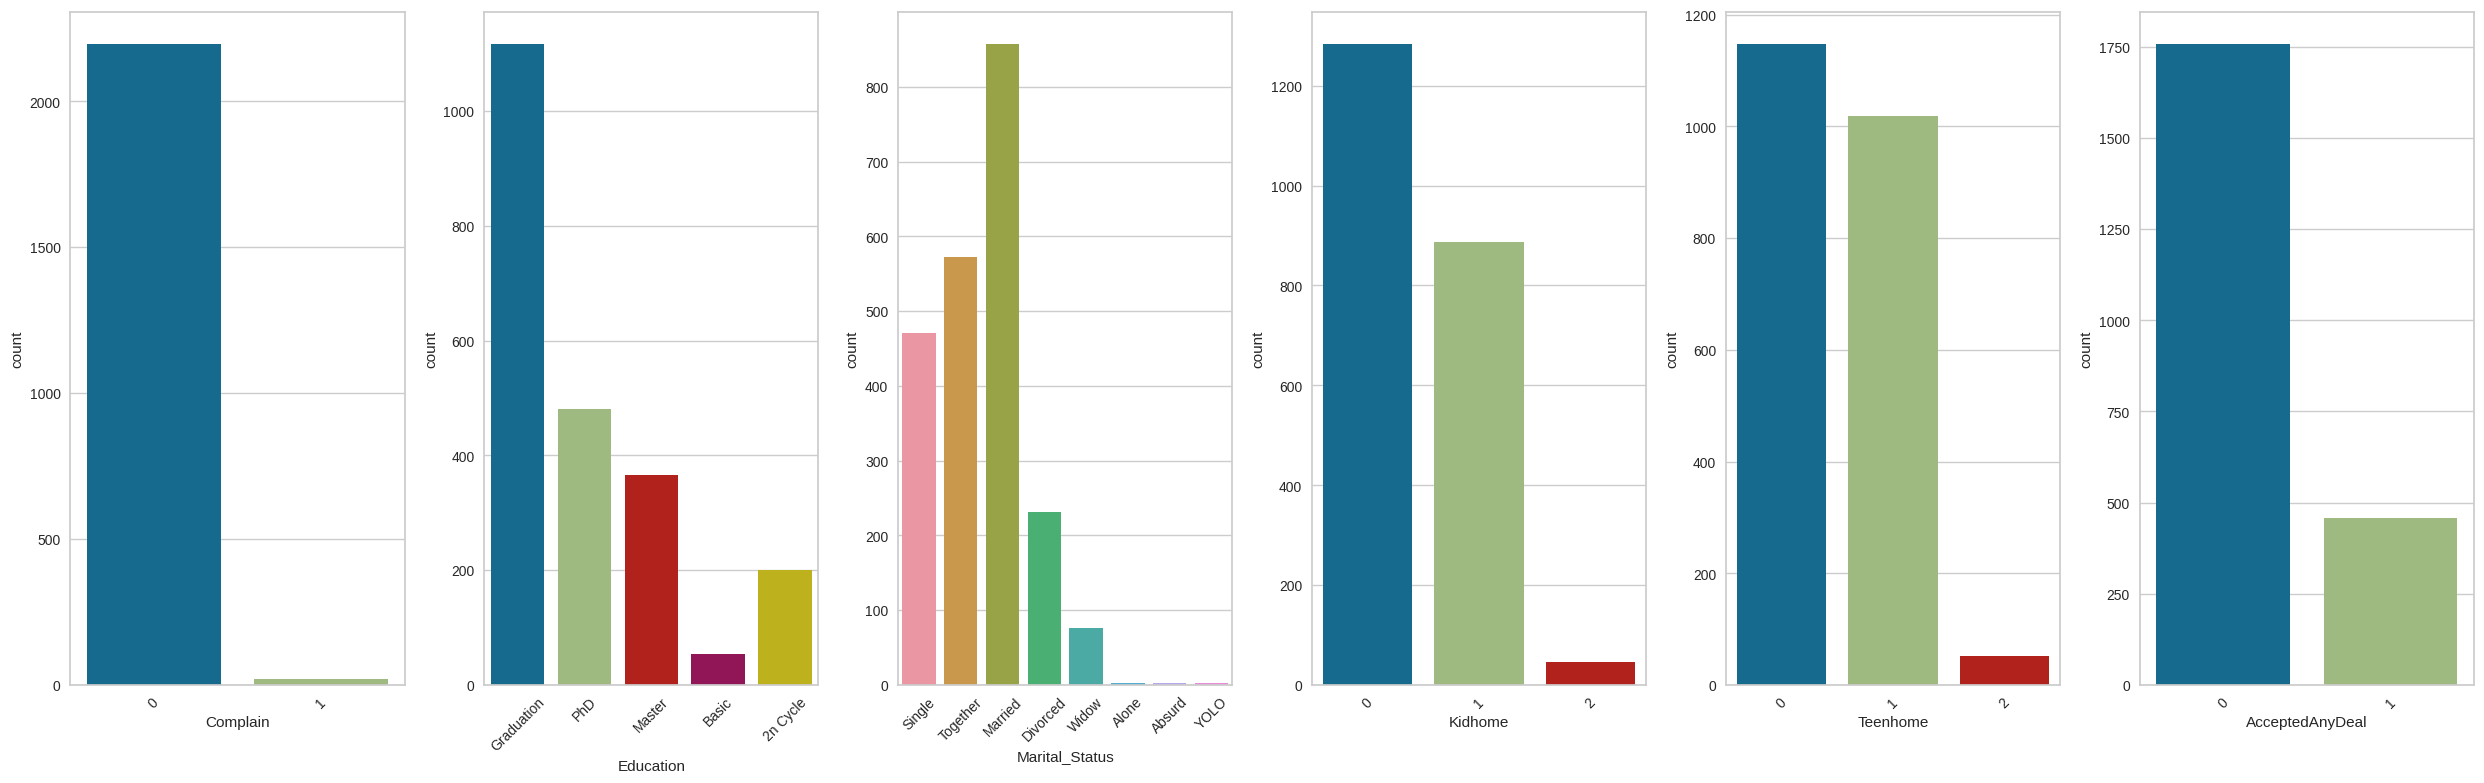

In [52]:
cal_cols = ['Complain', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome','AcceptedAnyDeal']
fig, ax = plt.subplots(1, len(cal_cols), figsize=(25, 8))
for col in enumerate(cal_cols):
    sns.countplot(data=data, x=col[1], ax=ax[col[0]])
    ax[col[0]].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

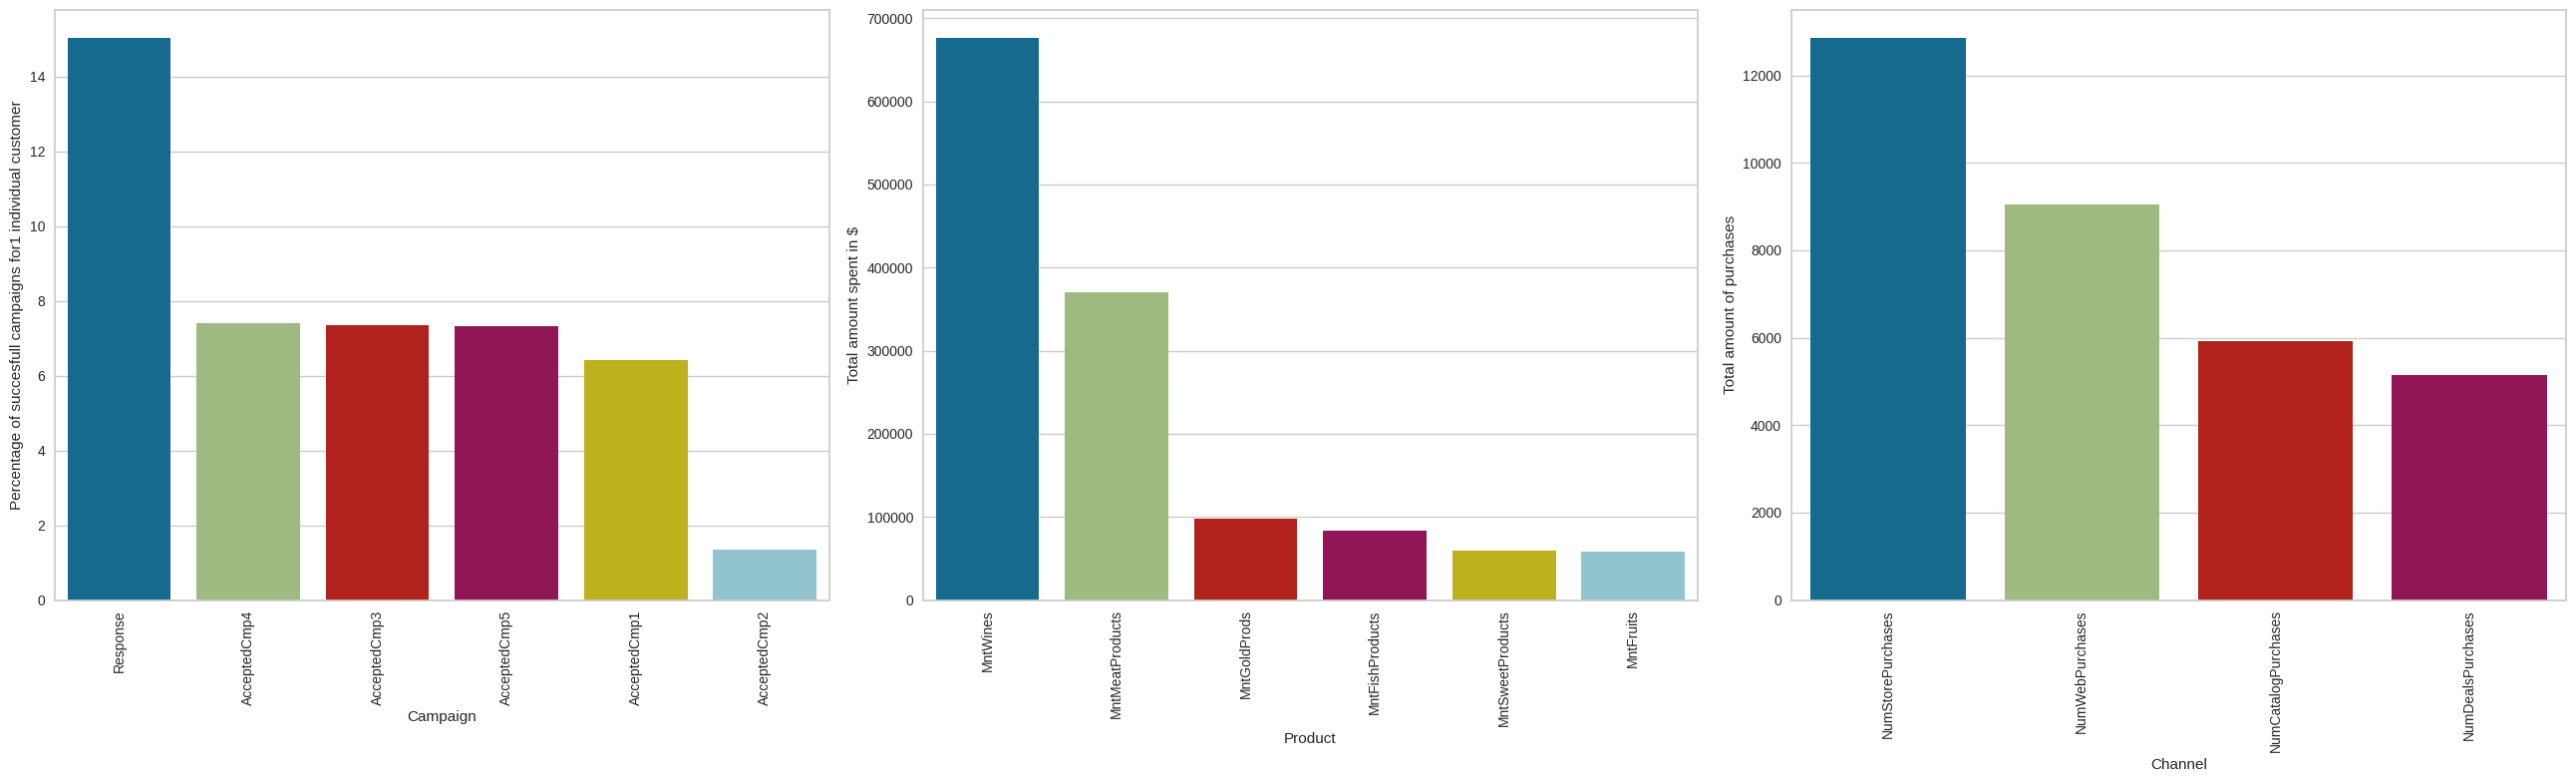

In [53]:
# What was the most succesfull campaign
def percentage(x):
    return x.sum() / x.count()*100

campaign_succes = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].agg(percentage)
campaign_succes = campaign_succes.sort_values(ascending=False)
fig, ax = plt.subplots(1, 3, figsize=(26, 8))
# plot
sns.barplot(x=campaign_succes.index, y=campaign_succes, ax=ax[0])
ax[0].set_ylabel('Percentage of succesfull campaigns for1 individual customer')
ax[0].set_xlabel('Campaign')
ax[0].tick_params(axis='x', rotation=90)

# what is thoe most succesfull product?
sum_product = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()   
sum_product = sum_product.sort_values(ascending=False)

# plot
sns.barplot(x=sum_product.index, y=sum_product, ax=ax[1])
ax[1].set_ylabel('Total amount spent in $')
ax[1].set_xlabel('Product')
ax[1].tick_params(axis='x', rotation=90)


# interesting is also whether where the customers bought there products
sum_channel = data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()
sum_channel = sum_channel.sort_values(ascending=False)

sns.barplot(x=sum_channel.index, y=sum_channel, ax=ax[2])
ax[2].set_ylabel('Total amount of purchases')
ax[2].set_xlabel('Channel')
ax[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">

Complain:
- Less then 1% of the customers complain. The vast majority of the customers do not complain. It can not be concluded that the vast majority is satisfied with the services. 
Education:
- Graduation, Basic and 2n Ccle is at this moment for me not clearly defined. So it is not possible to draw propper coclusions. 
Marital_Status:
- Most of the customers at at least in a relationship or married. More than 50% of the customers.
Kidhome and Teenhome:
- Most do not have a kid at home or Teen at home. I should get more exact numbers. Anoying but better. It is remarkable that the customers have more teens at home then kids at home. It can be seen that the people probably get less children today then back in the days, assuming statistical significance and nor systematic errors for this hypothesis.

<h4>Continous Variables</h4>

</div>


/home/tomruge/anaconda3/envs/env3.12.2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tomruge/anaconda3/envs/env3.12.2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tomruge/anaconda3/envs/env3.12.2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tomruge/anaconda3/envs/env3.12.2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

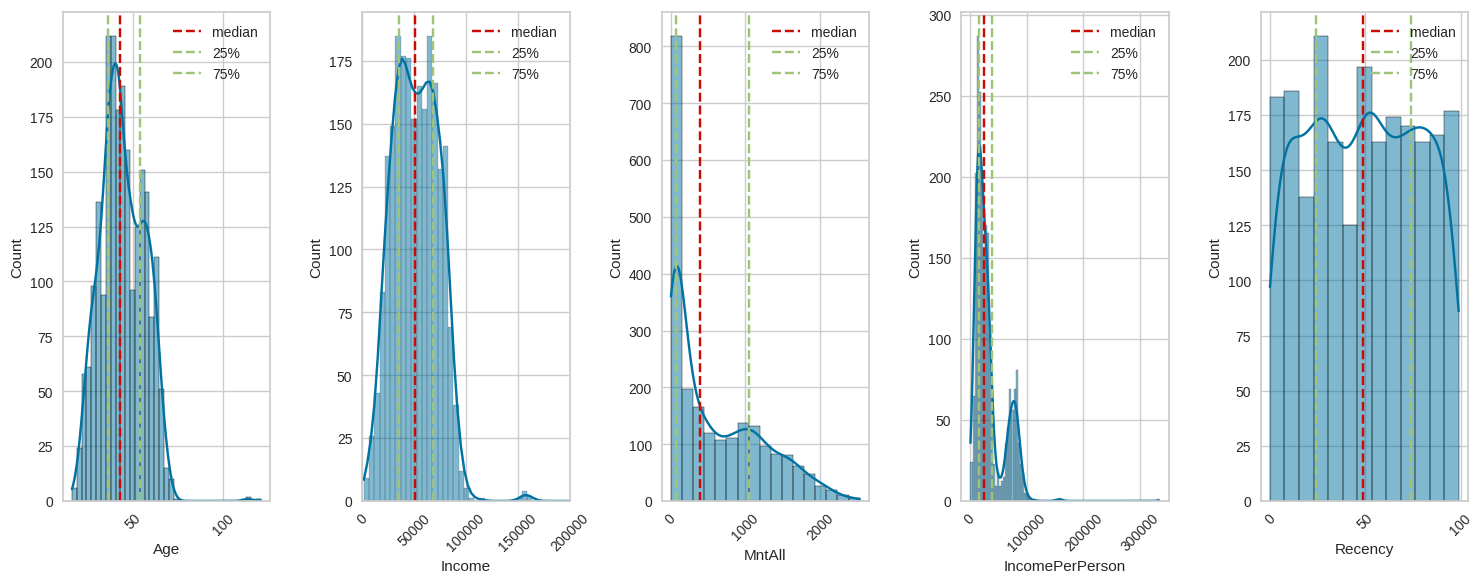

In [54]:
num_cols = ['Age', 'Income', 'MntAll', 'IncomePerPerson', 'Recency']
fig, ax = plt.subplots(1, len(num_cols), figsize=(15, 6))

def median_25_75(x):
    return x.median(), x.quantile(0.25), x.quantile(0.75)

for col in enumerate(num_cols):
    sns.histplot(data=data, x=col[1], ax=ax[col[0]], kde=True)
    median, q25, q75 = median_25_75(data[col[1]])
    ax[col[0]].axvline(median, color='r', linestyle='--', label='median')
    ax[col[0]].axvline(q25, color='g', linestyle='--', label='25%')
    ax[col[0]].axvline(q75, color='g', linestyle='--', label='75%')
    ax[col[0]].tick_params(axis='x', rotation=45)
    ax[col[0]].legend()

ax[1].set_xlim(0, 200000)
plt.tight_layout()
plt.show()

/home/tomruge/anaconda3/envs/env3.12.2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tomruge/anaconda3/envs/env3.12.2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tomruge/anaconda3/envs/env3.12.2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tomruge/anaconda3/envs/env3.12.2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

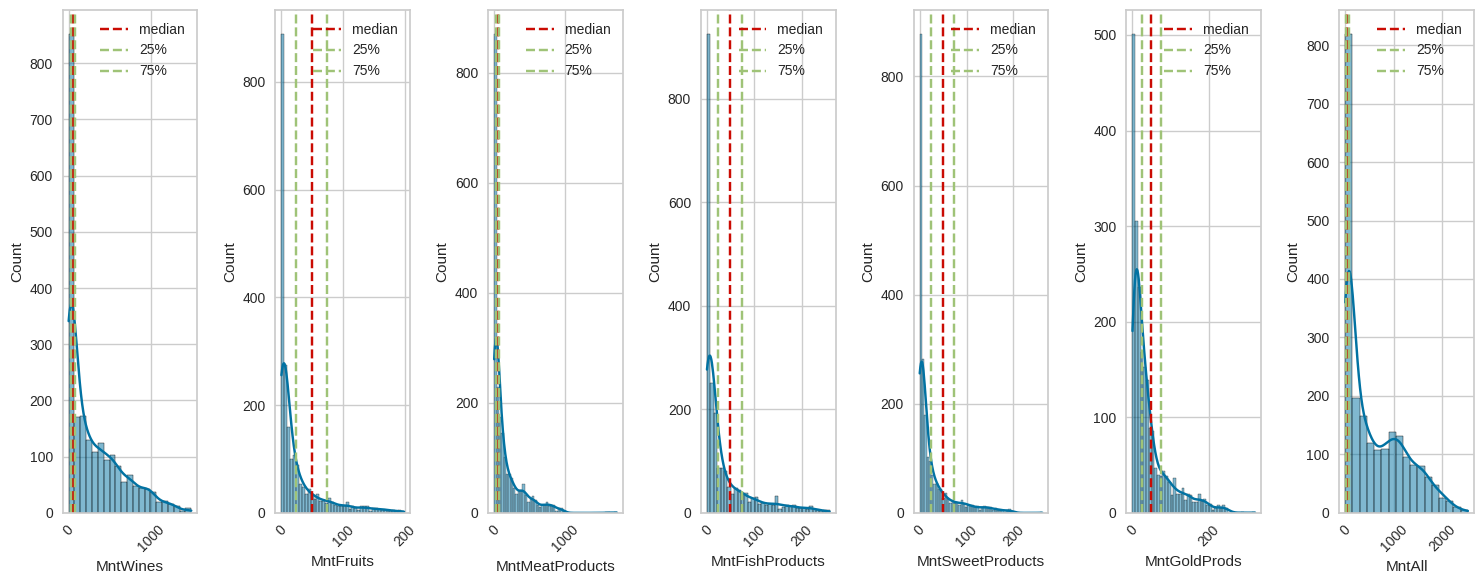

In [55]:
num_cols_mnt = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','MntAll']

def median_25_75(x):
    return x.median(), x.quantile(0.25), x.quantile(0.75)

fig, ax = plt.subplots(1, len(num_cols_mnt), figsize=(15, 6))
for col in enumerate(num_cols_mnt):
    sns.histplot(data=data, x=col[1], ax=ax[col[0]], kde=True)
    ax[col[0]].axvline(median, color='r', linestyle='--', label='median')
    ax[col[0]].axvline(q25, color='g', linestyle='--', label='25%')
    ax[col[0]].axvline(q75, color='g', linestyle='--', label='75%')
    ax[col[0]].tick_params(axis='x', rotation=45)
    ax[col[0]].legend()
        
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<h4>Bivariat and Multivariat Analysis</h4>

</div>

/home/tomruge/anaconda3/envs/env3.12.2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tomruge/anaconda3/envs/env3.12.2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tomruge/anaconda3/envs/env3.12.2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tomruge/anaconda3/envs/env3.12.2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

<Figure size 2000x600 with 0 Axes>

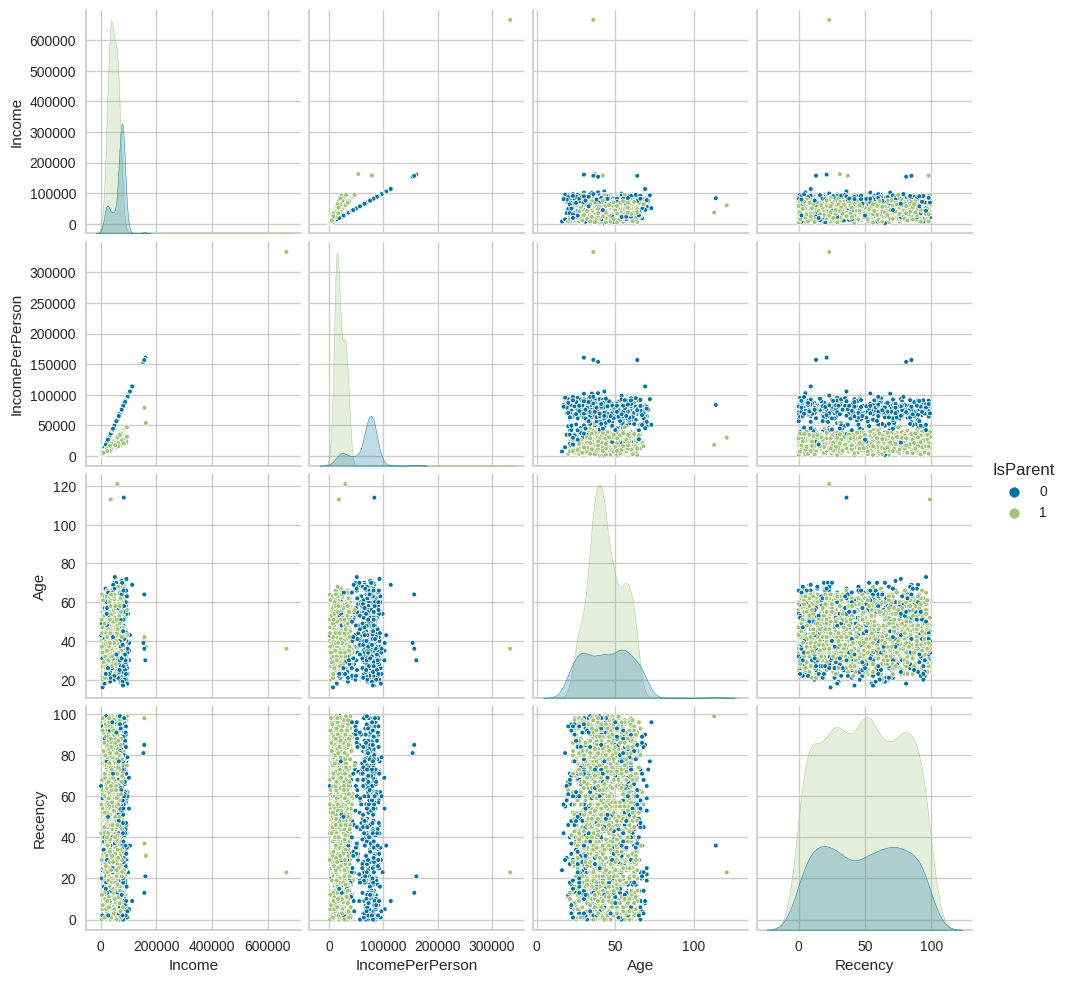

In [56]:
num_cols_pair = ['Income', 'IncomePerPerson', 'Age', 'Recency']
hue = 'IsParent'
plt.figure(figsize=(20, 6))
# smaller points, rotate 
sns.pairplot(data=data, vars=num_cols_pair, hue=hue, markers='.')
plt.show()

<div class="alert alert-block alert-info">

Correlation matrix

</div>

/home/tomruge/anaconda3/envs/env3.12.2/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

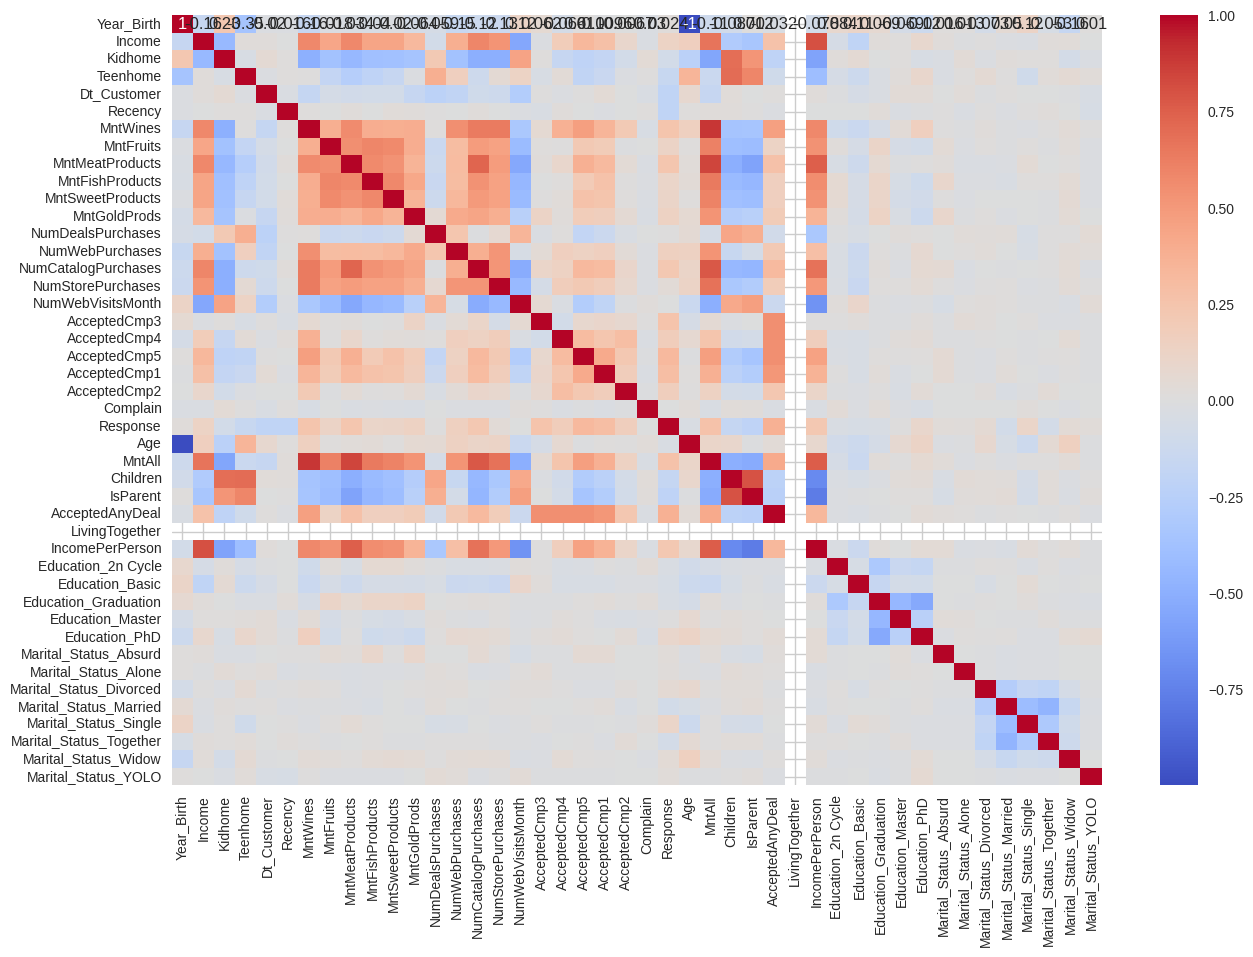

In [57]:
plt.figure(figsize=(15, 10))
sns.heatmap(pd.get_dummies(data).corr(), annot=True, cmap='coolwarm')

<div class="alert alert-block alert-info">
The registrations of customers stayed constant over the time. This means that the business probably did not grow in the two years.

### numeric variables vs categorial variables
</div>

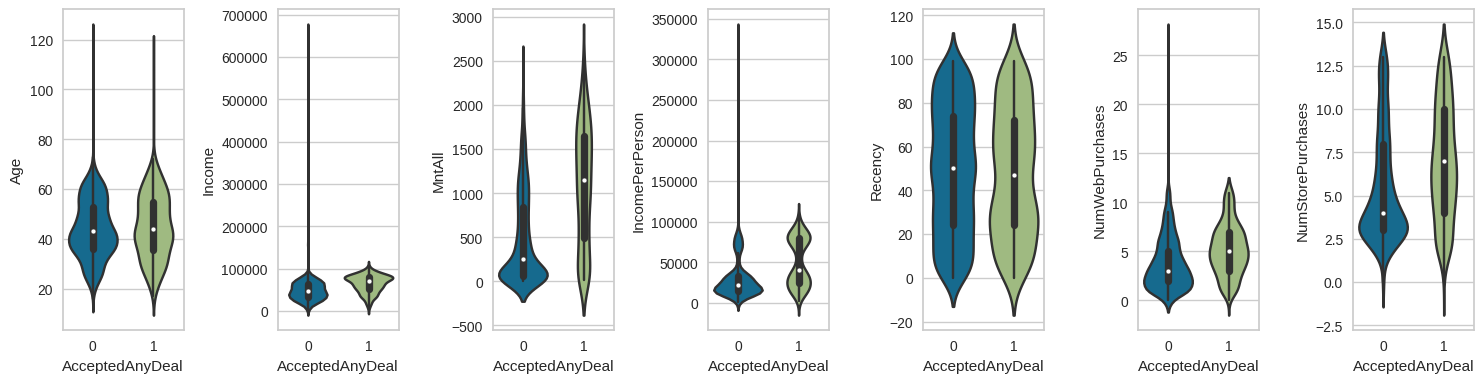

In [58]:
# ### hole spending amount vs. AcceptedAnyDeal in a violinplot
num_cols = ['Age', 'Income', 'MntAll', 'IncomePerPerson', 'Recency', 'NumWebPurchases','NumStorePurchases']
accepted_deal = 'AcceptedAnyDeal'

fig, ax = plt.subplots(1, len(num_cols), figsize=(15, 4))
for col in enumerate(num_cols):
    sns.violinplot(data=data, x=accepted_deal,y=col[1], ax=ax[col[0]])

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<h2>Clustering</h2>
</div>

<div class="alert alert-block alert-info">
<h3>Special encoding of the attributes</h3>

Education:
- The degree of completion can be considered both ordinal and cardinal. The order of the level of the degree is selected. On ehot encding is used.

Marital_Status:
- The Marital_Status with entries like Divorced, Married, Single, etc... can not be ordinal encoded. Therefore one hot encoding takes place here.

The other attributes are numerical or binary and can therefore be used as they are.

</div>

In [59]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'MntAll', 'Children',
       'IsParent', 'AcceptedAnyDeal', 'LivingTogether', 'IncomePerPerson'],
      dtype='object')

array([[ 4.39893226,  0.07948459, -1.43631391],
       [-2.8668351 ,  0.37015136,  1.51115553],
       [ 2.45788792, -0.67917012,  0.27736206],
       ...,
       [ 2.19725887, -0.98245826, -0.26684174],
       [ 1.80198552,  1.32845121,  1.26568117],
       [-2.45531559,  1.23989437,  0.87445619]])

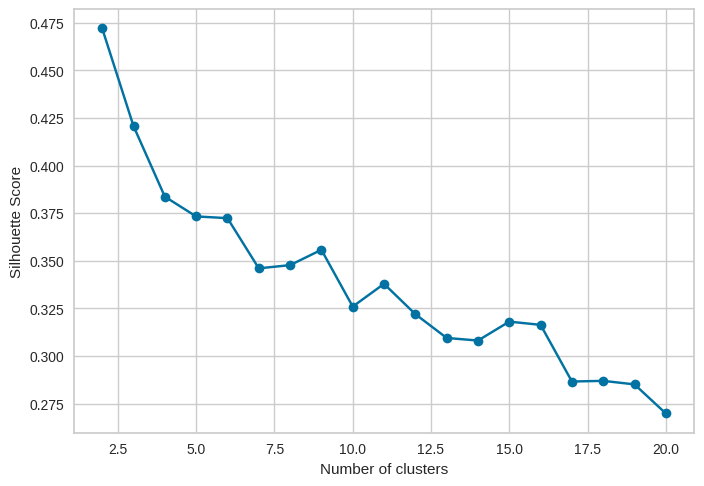

/home/tomruge/anaconda3/envs/env3.12.2/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


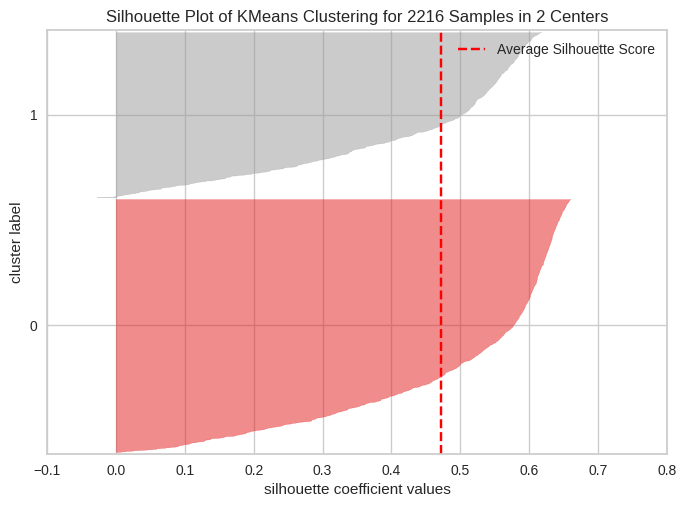

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
# pricipal component analysis
from sklearn.decomposition import PCA

# drop the columns with nan
data.dropna(inplace=True)
num_cols = ['Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 
       'Age', 'MntAll', 'Children', 'IncomePerPerson']

cat_cols = ['Education', 'Marital_Status', 'AcceptedAnyDeal']

bin_col = [ 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'IsParent', 'LivingTogether']

class KMEANS_Wrapper:
    def __init__(self,data, num_cols, cat_cols, bin_cols, min_clusters=1, max_clusters=20, n_components=3, pca = False):
        self.data = data
        self.min_clusters = min_clusters
        self.max_clusters = max_clusters
        self.num_cols = num_cols
        self.cat_cols = cat_cols
        self.bin_cols = bin_cols
        self.n_components = n_components
        self.pca = pca

        # used attributes:
        self.used_attributes = self.num_cols + self.cat_cols + self.bin_cols

    def pca_features(self, X, n_components = 3):
        self.pca = PCA(n_components=n_components)
        return self.pca.fit_transform(X)

    def prep_fit_evaluate(self):
        self.X = self.preprocessor()
        if self.pca:
            self.X = self.pca_features(self.X, self.n_components)
            display(self.X)
        self.find_optimal_clusters(self.X)
        self.plot_optimal_cluster_knee()

    def preprocessor(self):
        num_pipeline = Pipeline([
            ('scaler', StandardScaler())
        ])
        cat_pipeline = Pipeline([
            ('encoder', OneHotEncoder())
        ])
        preprocessor = ColumnTransformer([
            ('num_scaler', num_pipeline, self.num_cols),
            ('cat_onehot', cat_pipeline, self.cat_cols)
        ])
        return preprocessor.fit_transform(self.data)
    
    def find_optimal_clusters(self, data):
        self.silhouette_scores = []
        for i in range(self.min_clusters, self.max_clusters+1):
            model = KMeans(n_clusters=i, random_state=42, n_init=10, max_iter=1000)
            silhouette = silhouette_score(data, model.fit_predict(data))
            self.silhouette_scores.append(silhouette)
    
    def plot_optimal_cluster_knee(self):
        plt.plot(range(self.min_clusters, self.max_clusters+1),self.silhouette_scores, marker='o')
        plt.xlabel('Number of clusters')
        plt.ylabel('Silhouette Score')
        plt.show()

    def silhouette_plot(self, n_cluster = 1):
        model = KMeans(n_clusters=n_cluster, random_state=42)
        visualizer = SilhouetteVisualizer(model)
        visualizer.fit(self.X)
        visualizer.show()

    def fit(self, data):
        X = self.preprocessor(data)
        X = self.select_features(X)
        self.model.fit(X)
    
    def dim_reduction(self, data):
        # before using 
        X = self.preprocessor(data)
        X = self.select_features(X)
        return self.pca.transform(X)
    
model = KMEANS_Wrapper(data = data, num_cols=num_cols, cat_cols=cat_cols, bin_cols=bin_col, min_clusters=2, max_clusters=20, n_components=3, pca=True)
model.prep_fit_evaluate()
model.silhouette_plot(n_cluster=2)


/home/tomruge/anaconda3/envs/env3.12.2/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


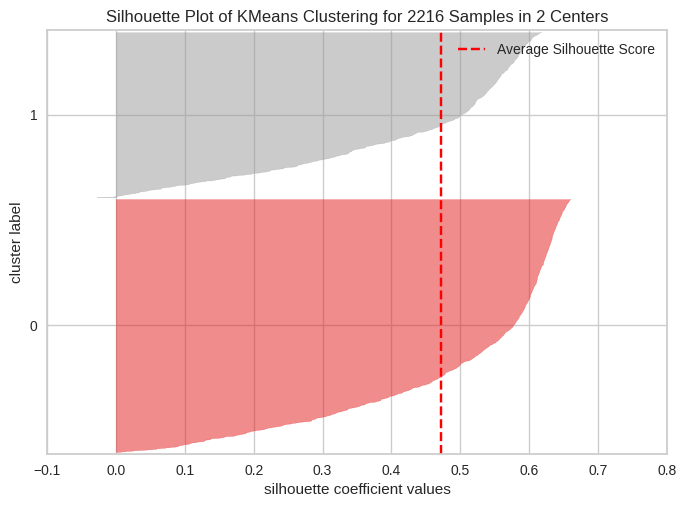

/home/tomruge/anaconda3/envs/env3.12.2/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


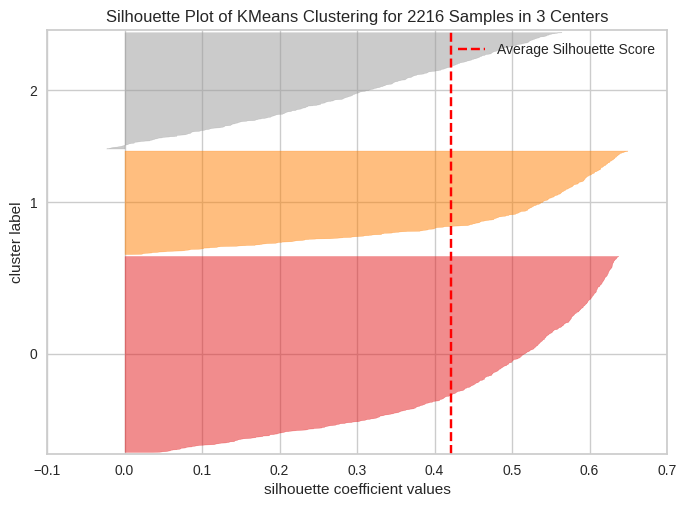

/home/tomruge/anaconda3/envs/env3.12.2/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


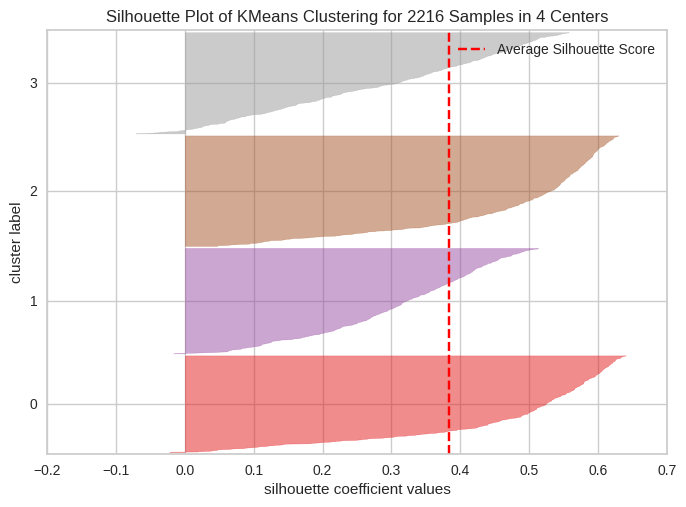

/home/tomruge/anaconda3/envs/env3.12.2/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


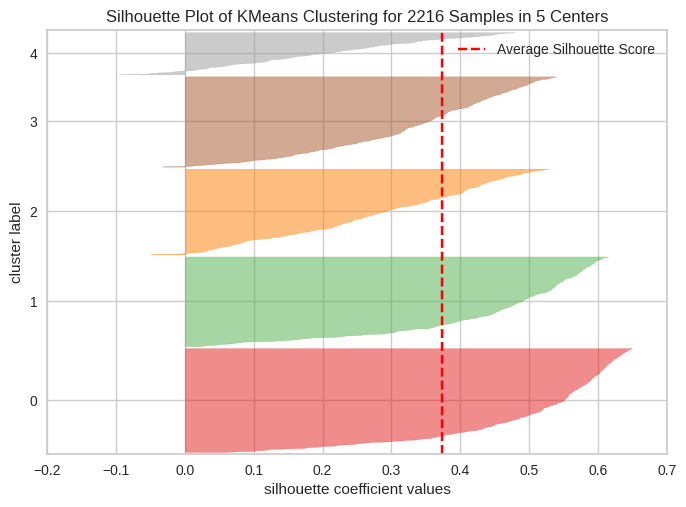

In [61]:
for i in range(2, 6):
    model.silhouette_plot(n_cluster=i)
    plt.show()

<div class="alert alert-block alert-info">
It can be seen that the clustering of all attributes was not succesfull. This siohouette score is very low. Only a weak till no structure is existent.
</div>
